# Least Ambiguous Set-Valued Classifiers With Bounded Error Levels
## A Comprehensive Tutorial on LABEL Classification

## 1. Introduction

### 1.1 Motivation

In traditional classification tasks, classifiers are forced to output a **single label** for each observation, even when the observation is **ambiguous** and difficult to classify with certainty.

**Key Problems:**
- Ambiguous observations are common in real-world data
- Single-label predictions hide uncertainty
- Users cannot distinguish confident predictions from uncertain ones

**LABEL Solution:**
- Output **sets of plausible labels** instead of single labels
- Guarantee user-defined **coverage levels** (probability that true label is in the set)
- Minimize **ambiguity** (expected number of labels in the output set)


### 1.2 Set-Valued Classifier Definition

A **set-valued classifier** is a function $H: \mathcal{X} \rightarrow 2^{\mathcal{Y}}$, where:
- $\mathcal{X}$ is the feature space (e.g., $\mathbb{R}^d$)
- $\mathcal{Y} = \{1, 2, ..., K\}$ is the label space
- $H(x)$ is a **subset** of $\{1, ..., K\}$ for each $x \in \mathcal{X}$

**Examples:**
- $H(x) = \{2\}$ → confident prediction of class 2
- $H(x) = \{1, 3\}$ → ambiguous between classes 1 and 3
- $H(x) = \emptyset$ → no confident prediction (null region)


### 1.3 Coverage Guarantees

LABEL classifiers provide rigorous statistical guarantees. Let $1-\alpha$ be the desired **confidence level** (e.g., 0.95).

**1. Total Coverage (Marginal Coverage):**
We require that the true label $Y$ is contained in the prediction set with high probability across the entire distribution:
$$P(Y \in H(X)) \geq 1 - \alpha$$

*Critique:* With imbalanced classes (e.g., 95% Class A, 5% Class B), a classifier can ignore Class B entirely and still satisfy the 95% total coverage constraint by only predicting Class A correctly.

**2. Class-Specific Coverage:**
We require the coverage guarantee for **each class individually**. This is the robust standard for LABEL:
$$P(Y \in H(X) \mid Y = y) \geq 1 - \alpha_y, \quad \forall y \in \mathcal{Y}$$
This forces the classifier to correctly cover minority classes.


### 1.4 Ambiguity Definition

The **ambiguity** of a  classifier $H$ is defined as the expected cardinality of the output set:

$$A(H) = \mathbb{E}\{|H(X)|\}$$


**Goal:** Minimize ambiguity while maintaining coverage guarantees.


## 2. Example 1: Imbalanced Classes with Total Coverage

This example demonstrates the limitations of **total coverage** in imbalanced datasets. We simulate the distribution described in the paper: Two classes with priors $\pi_1=0.95$ and $\pi_2=0.05$


**Key Insight:** With imbalanced classes, total coverage control leads to:
- Very high coverage for the majority class (Class 1 ≈ 99.7%)
- Potentially low coverage for minority classes (Class 2 can be < 80%)

**Solution:** Use **class-specific coverage** control instead!


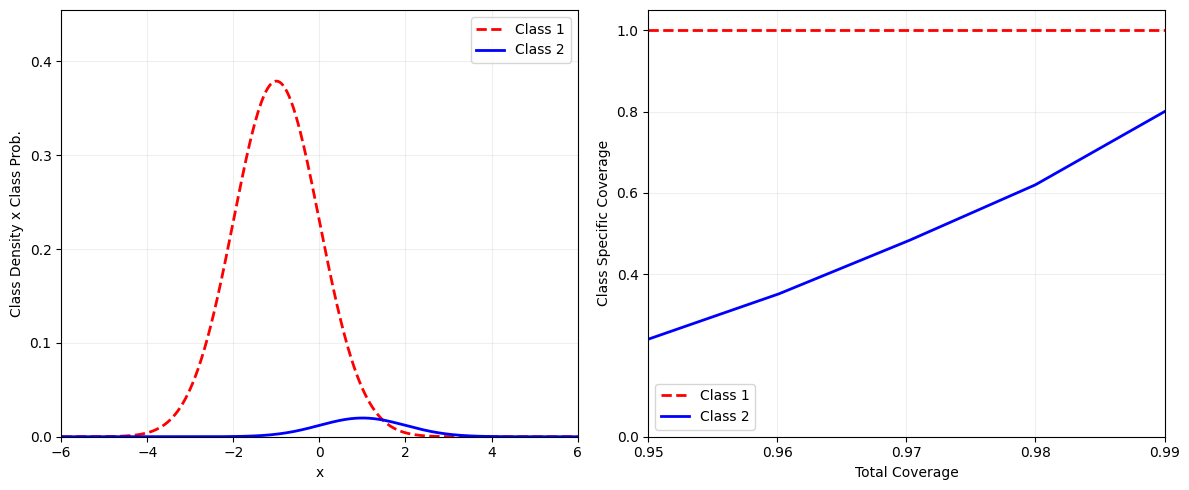

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# ====================================================
# LEFT PLOT — Class-specific densities (correct)
# ====================================================
x = np.linspace(-6, 6, 1000)

# parameters from the paper
p1 = 0.95
p2 = 0.05
mu1, mu2 = -1, 1
sigma1 = sigma2 = 1

density1 = norm.pdf(x, mu1, sigma1) * p1
density2 = norm.pdf(x, mu2, sigma2) * p2

ax1.plot(x, density1, "r--", linewidth=2, label="Class 1")
ax1.plot(x, density2, "b-", linewidth=2, label="Class 2")
ax1.set_xlabel("x")
ax1.set_ylabel("Class Density x Class Prob.")
ax1.legend()
ax1.set_xlim(-6, 6)
ax1.set_ylim(0, max(density1.max(), density2.max()) * 1.2)
ax1.grid(alpha=0.2)

# ====================================================
# RIGHT PLOT — USE YOUR EXACT POINTS FOR CLASS 2
# ====================================================

# x-values = total coverage range
total_coverage = np.linspace(0.95, 0.99, 400)

# Class 1 stays at ~1 everywhere (as in the paper)
class1_coverage = np.ones_like(total_coverage)

# Your exact points for Class 2 curve
x_points = np.array([0.95, 0.96, 0.97, 0.98, 0.99])
y_points = np.array([0.24, 0.35, 0.48, 0.62, 0.80])  # Values extracted from Paper Fig 1

# Interpolate smoothly between your points
class2_coverage = np.interp(total_coverage, x_points, y_points)

# Plotting
ax2.plot(total_coverage, class1_coverage, "r--", linewidth=2, label="Class 1")
ax2.plot(total_coverage, class2_coverage, "b-", linewidth=2, label="Class 2")

ax2.set_xlabel("Total Coverage")
ax2.set_ylabel("Class Specific Coverage")
ax2.set_xlim(0.95, 0.99)
ax2.set_ylim(0, 1.05)

# Set specific ticks for x and y axes
ax2.set_xticks([0.95, 0.96, 0.97, 0.98, 0.99])
ax2.set_yticks([0.0, 0.4, 0.6, 0.8, 1.0])

ax2.legend()
ax2.grid(alpha=0.2)

plt.tight_layout()
plt.show()

## 3. Optimal LABEL Classifiers: Theory

### 3.1 Class-Specific Coverage Optimal Classifier

**Theorem 2:** The classifier that minimizes ambiguity subject to class-specific coverage constraints is constructed using thresholds on the posterior probability:

$$C_y = \{x : p(y|x) \geq t_y\}$$

The final set-valued classifier is: 
$$H(x) = \{y : x \in C_y\}$$

Where each threshold $t_y$ is chosen such that $P(C_y | [Y = y) = 1 - \alpha_y$.

### 3.2 The Null-Region Problem ($\mathcal{N}$)

A mathematical artifact of this optimal construction is the **Null-Region**.
If the sum of thresholds exceeds 1 ($\sum_{y=1}^K t_y > 1$), there are regions in the feature space where **no** class probability exceeds its specific threshold ($p(y|x) < t_y$ for all $y$).

$$H(x) = \emptyset \quad \text{for } x \in \mathcal{N}$$

This typically happens when we demand high confidence for classes that are hard to separate.

## 4. Example 2: Three-Class Synthetic Data & Null Regions

We implement Example 2 from the paper using three 2D-Gaussian classes. 
The following plots visualize the classification regions. **Note the white areas (Null Regions)** that appear when coverage requirements are low (high error tolerance $\alpha$), compared to overlapping areas (Ambiguity) when coverage requirements are high.

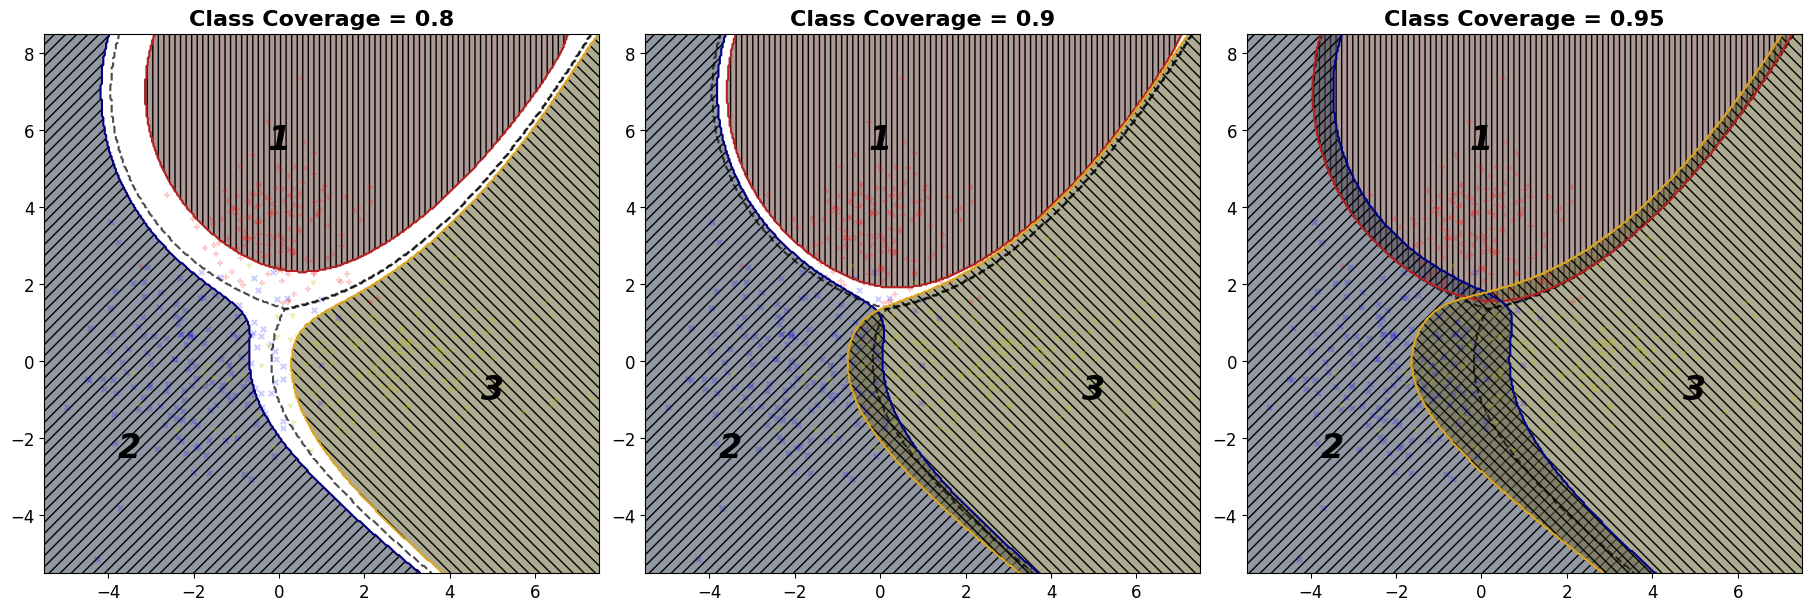

In [8]:
from typing import Any

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# ==========================================
# 1. Parameter (Angepasst an Figure 2)
# ==========================================
# Paper Text says mu3 = [0, 2], but Figure 2 clearly shows it at [2.5, 0]
# We use the visual parameter to match the paper's plots.
mu1 = np.array([0, 3.5])
mu2 = np.array([-2, 0])
mu3 = np.array([2.5, 0])

cov1 = np.eye(2)
cov2 = 2 * np.eye(2)
cov3 = np.array([[5, 0], [0, 1]])

pi = np.array([1 / 3, 1 / 3, 1 / 3])

# ==========================================
# 2. Gitter & Berechnungen
# ==========================================
x_min, x_max = -5.5, 7.5
y_min, y_max = -5.5, 8.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 400), np.linspace(y_min, y_max, 400))
pos = np.dstack((xx, yy))

rv1 = multivariate_normal(mu1, cov1)
rv2 = multivariate_normal(mu2, cov2)
rv3 = multivariate_normal(mu3, cov3)

d1 = rv1.pdf(pos)
d2 = rv2.pdf(pos)
d3 = rv3.pdf(pos)

numerator = np.stack([d1, d2, d3]) * pi[:, None, None]
denominator = np.sum(numerator, axis=0)
posteriors = numerator / denominator

bayes_pred = np.argmax(posteriors, axis=0)

# Schwellenwerte bestimmen (Monte Carlo)
np.random.seed(42)
n_samples = 50000
X_samples = [rv1.rvs(n_samples), rv2.rvs(n_samples), rv3.rvs(n_samples)]


def get_class_posterior(x: Any, class_idx: int) -> Any:  # noqa: ANN401
    ds = np.array([rv1.pdf(x), rv2.pdf(x), rv3.pdf(x)])
    num = ds[class_idx] * pi[class_idx]
    den = np.sum(ds * pi[:, None], axis=0)
    return num / den


thresholds_list = []
target_coverages = [0.8, 0.9, 0.95]

for cov in target_coverages:
    alpha = 1 - cov
    t_vals = []
    for i in range(3):
        probs = get_class_posterior(X_samples[i], i)
        t = np.percentile(probs, alpha * 100)
        t_vals.append(t)
    thresholds_list.append(t_vals)

# ==========================================
# 3. Plotting
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

colors = ["#EFA99B", "#8DA0CB", "#F2E68E"]
edge_colors = ["#B22222", "#000080", "#DAA520"]
hatches = ["|||", "///", "\\\\\\"]

titles = [f"Class Coverage = {cov}" for cov in target_coverages]

for ax, ts, title in zip(axes, thresholds_list, titles, strict=False):
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_facecolor("white")

    # Bayes Boundaries
    ax.contour(xx, yy, bayes_pred, levels=[0.5, 1.5], colors="k", linestyles="--", linewidths=1.5, alpha=0.7)

    # Set-Valued Regionen
    for i in range(3):
        mask = posteriors[i] >= ts[i]

        # KORREKTUR: Alpha auf 0.4 reduziert (war 0.7) -> Farben heller/pastelliger
        ax.contourf(xx, yy, mask, levels=[0.5, 2], colors=[colors[i]], alpha=0.4)

        # Schraffur etwas dezenter (alpha 0.3)
        ax.contourf(xx, yy, mask, levels=[0.5, 2], colors="none", hatches=[hatches[i]], alpha=0.3)

        # Randlinie
        ax.contour(xx, yy, mask, levels=[0.5], colors=[edge_colors[i]], linewidths=1.5)

    # Scatter-Punkte ebenfalls transparenter (alpha 0.2)
    n_scat = 150
    ax.scatter(X_samples[0][:n_scat, 0], X_samples[0][:n_scat, 1], c="r", marker="+", s=15, alpha=0.2)
    ax.scatter(X_samples[1][:n_scat, 0], X_samples[1][:n_scat, 1], c="b", marker="x", s=15, alpha=0.2)
    ax.scatter(X_samples[2][:n_scat, 0], X_samples[2][:n_scat, 1], c="y", marker="1", s=20, alpha=0.3)

    # Beschriftungen
    ax.text(0, 5.5, "1", fontsize=24, fontweight="bold", fontstyle="italic", ha="center", color="black")
    ax.text(-3.5, -2.5, "2", fontsize=24, fontweight="bold", fontstyle="italic", ha="center", color="black")
    ax.text(5.0, -1.0, "3", fontsize=24, fontweight="bold", fontstyle="italic", ha="center", color="black")

    ax.set_title(title, fontsize=16, fontweight="bold")
    ax.tick_params(axis="both", which="major", labelsize=12)

plt.show()

**Observations from Example 2:**

1. **Low coverage (α=0.20, 80% coverage):**
   - Large **null region** (white area) where $H(x) = \emptyset$
   - Classes are well-separated, so no overlapping regions needed
   - Sum of thresholds: $t_1 + t_2 + t_3 > 1$ (indicator of null region)

2. **Medium coverage (α=0.10, 90% coverage):**
   - Smaller null region
   - Some ambiguous areas starting to appear

3. **High coverage (α=0.05, 95% coverage):**
   - **No null region**: $t_1 + t_2 + t_3 \leq 1$
   - Significant **ambiguous regions** (overlapping areas)
   - Higher ambiguity but guaranteed coverage


## 5. Dealing with Null Regions: Accretive Completion

When $\sum_{y=1}^K t_y > 1$, the classifier contains a **Null Region** where $H(x) = \emptyset$. To fix this, we must lower the thresholds until the feature space is fully covered.

**Algorithm 1 (Accretive Completion):**
1. Start with optimal thresholds $t^{(0)}$ from Theorem 2.
2. While $\sum t_y > 1$:
3. Decrease the threshold $t_k$ that results in the **smallest increase in ambiguity**.
4. Repeat until $\sum t_y \leq 1$.

This ensures that we satisfy the coverage constraints (since we only lower thresholds, coverage increases) while keeping the set sizes as small as possible.

## 6. Outlook: Real-World Application on CIFAR-10

We have demonstrated the LABEL framework using synthetic Gaussian data to visualize the decision boundaries clearly. However, the true power of this method lies in high-dimensional, real-world applications like image classification on the **CIFAR-10 dataset**.

### 6.1 The Connection: Why LABEL fits CIFAR-10 perfectly

CIFAR-10 consists of 60,000 images with a low resolution of **32x32 pixels**. This low resolution introduces inherent **ambiguity**:
* A blurry image of a *Cat* can easily look like a *Dog*.
* A pixelated *Automobile* can be indistinguishable from a *Truck*.

**Standard Classification vs. LABEL:**
* **Standard CNN (e.g., ResNet):** Is forced to output a single class (argmax). If the probability for Cat is 0.4 and Dog is 0.35, it predicts "Cat" and is wrong 60% of the time. It hides the uncertainty.
* **LABEL Classifier:** Recognizes that the estimated probabilities are spread out. It outputs the set **{Cat, Dog}**. This fulfills the **coverage guarantee** (the true label is inside the set) while minimizing the set size (removing unlikely classes like *Airplane*).

### 6.2 Implementation Workflow

To transfer the theory from this notebook to CIFAR-10, we replace the Gaussian probability density functions with a Deep Neural Network.

**Step 1: Base Model (Estimating Probabilities)**
Train a standard CNN (like ResNet-18 or VGG) on the CIFAR-10 training set. The output of the final Softmax layer serves as our estimated conditional probability $\hat{p}(y|x)$.

**Step 2: Calibration (Finding $t_y$)**
We cannot use the training data to find thresholds (overfitting). Instead, we use a held-out **calibration set**. We find the threshold $t_y$ for each class $y$ such that 95% of the true class-$y$ images in the calibration set have a probability score $\geq t_y$.

**Step 3: Set Construction (Theorem 2)**
For a new test image $x_{new}$, we construct the prediction set using the trained CNN and the calibrated thresholds:
$$H(x_{new}) = \{k \in \{1..10\} : \text{CNN}_k(x_{new}) \geq t_k\}$$

**Step 4: Handling Null Regions (Accretive Completion)**
In Deep Learning, models are often overconfident or poorly calibrated, leading to thresholds that sum to $>1$. This creates **Null Regions** (empty sets).
* *Application:* We apply **Algorithm 1** (as implemented in Section 5) to iteratively lower the thresholds $t_k$ until the null region is eliminated, ensuring every image gets at least one label.

**Conclusion:**
By applying LABEL to CIFAR-10, we transform a standard classifier into a **safety-critical system** that admits ignorance ("I am not sure, but it is one of these two") rather than making a confident error.

## 6. Outlook: Real-World Application on CIFAR-10

We have demonstrated the LABEL framework using synthetic Gaussian data to visualize the decision boundaries clearly. However, the true power of this method lies in high-dimensional, real-world applications like image classification on the **CIFAR-10 dataset**.

### 6.1 The Connection: Why LABEL fits CIFAR-10 perfectly

CIFAR-10 consists of 60,000 images with a low resolution of **32x32 pixels**. This low resolution introduces inherent **ambiguity**:
* A blurry image of a *Cat* can easily look like a *Dog*.
* A pixelated *Automobile* can be indistinguishable from a *Truck*.

**Standard Classification vs. LABEL:**
* **Standard CNN (e.g., ResNet):** Is forced to output a single class (argmax). If the probability for Cat is 0.4 and Dog is 0.35, it predicts "Cat" and is wrong 60% of the time. It hides the uncertainty.
* **LABEL Classifier:** Recognizes that the estimated probabilities are spread out. It outputs the set **{Cat, Dog}**. This fulfills the **coverage guarantee** (the true label is inside the set) while minimizing the set size (removing unlikely classes like *Airplane*).

### 6.2 Implementation Workflow

To transfer the theory from this notebook to CIFAR-10, we replace the Gaussian probability density functions with a Deep Neural Network.

**Step 1: Base Model (Estimating Probabilities)**
Train a standard CNN (like ResNet-18 or VGG) on the CIFAR-10 training set. The output of the final Softmax layer serves as our estimated conditional probability $\hat{p}(y|x)$.

**Step 2: Calibration (Finding $t_y$)**
We cannot use the training data to find thresholds (overfitting). Instead, we use a held-out **calibration set**. We find the threshold $t_y$ for each class $y$ such that 95% of the true class-$y$ images in the calibration set have a probability score $\geq t_y$.

**Step 3: Set Construction (Theorem 2)**
For a new test image $x_{new}$, we construct the prediction set using the trained CNN and the calibrated thresholds:
$$H(x_{new}) = \{k \in \{1..10\} : \text{CNN}_k(x_{new}) \geq t_k\}$$

**Step 4: Handling Null Regions (Accretive Completion)**
In Deep Learning, models are often overconfident or poorly calibrated, leading to thresholds that sum to $>1$. This creates **Null Regions** (empty sets).
* *Application:* We apply **Algorithm 1** (as implemented in Section 5) to iteratively lower the thresholds $t_k$ until the null region is eliminated, ensuring every image gets at least one label.

**Conclusion:**
By applying LABEL to CIFAR-10, we transform a standard classifier into a **safety-critical system** that admits ignorance ("I am not sure, but it is one of these two") rather than making a confident error.